# Data cleaning
Clean the data by fixing missing values and creating the adjacency matrix.


## Data exploration
Before creating the network, we need to explore the data to understand the structure of the dataset

In [5]:
import pandas as pd
import numpy as np

patients = pd.read_csv("../dataset/large_dataset.csv",compression='gzip')
patients.rename(columns={"diseases": "Disease"}, inplace=True)
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 379 entries, Unnamed: 0 to neck weakness
dtypes: int64(378), object(1)
memory usage: 714.1+ MB


In [6]:
patients.describe()

,Unnamed: 0,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.00000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,123472.00000,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,71287.02545,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,61736.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,123472.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,185208.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,246944.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [7]:
patients.sample(15).sort_values('Disease').reset_index(drop=True).style.background_gradient(cmap='Blues')

## One-hot encoding

In [8]:
patients_diseases = patients["Disease"].values.tolist()
diseases_list = patients["Disease"].unique()
pd.DataFrame(diseases_list, columns=["Disease"]).to_csv("../dataset/diseases.csv",index=False)

# Create a dictionary mapping each unique disease name to a unique numerical label
label_mapping = {disease: label for label, disease in enumerate(set(diseases_list))}

# Map the original disease names to numerical labels
diseases_labels = [label_mapping[disease] for disease in patients_diseases]

# Add the 'Disease' column to the new DataFrame
patients_with_labels = patients.copy()
patients_with_labels["Disease"] = diseases_labels

patients_with_labels.to_csv("../dataset/large_one_hot_encoding.csv", index=False)

# Class balance check

<Axes: title={'center': 'Disease distribution'}, xlabel='Disease', ylabel='Percent'>

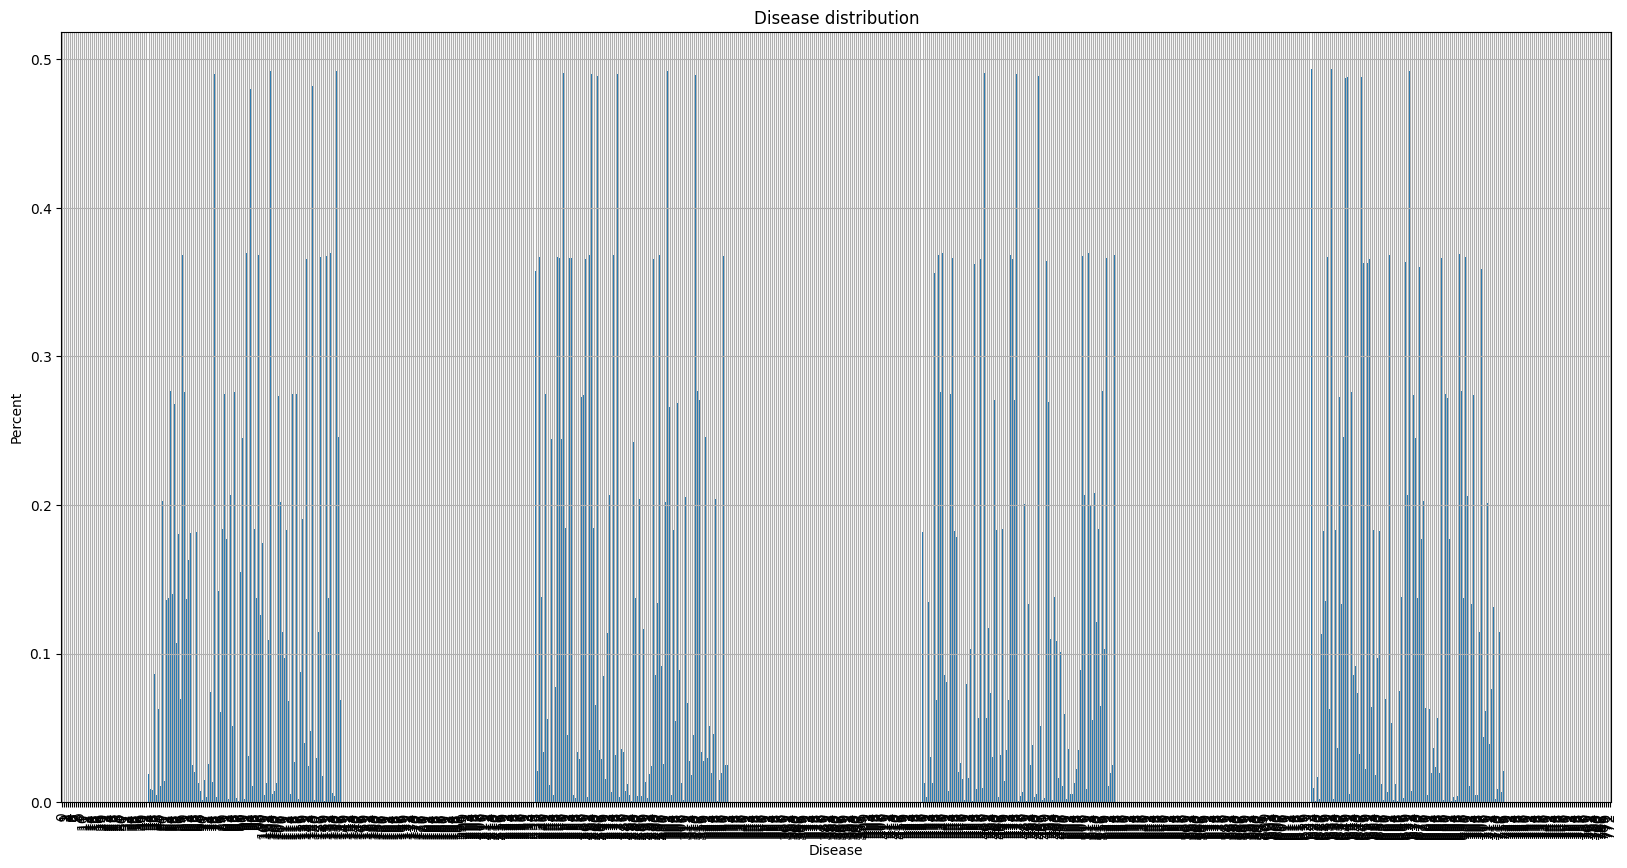

In [9]:
balance_count = patients_with_labels["Disease"].groupby(patients_with_labels["Disease"]).count()
balance_percent = balance_count / patients_with_labels["Disease"].count() * 100

balance_percent.plot(
    kind="bar",
    figsize=(20, 10),
    title="Disease distribution",
    grid=True,
    ylabel="Percent",
    xlabel="Disease",
)

In [10]:
# Store the one-hot-encoded DataFrame in a .npz file
tmp = np.array(patients_with_labels)
np.savez_compressed("../code/prediction_model/features/symptoms.npz", X = tmp[:,:-1], y = tmp[:,-1])

## Compute adjacency matrix

In [11]:
adjacency_matrix = patients.groupby("Disease").sum()

adjacency_matrix = adjacency_matrix.reset_index()
adjacency_matrix = adjacency_matrix.drop(["Disease"], axis=1)

adjacency_matrix = adjacency_matrix.apply(
    lambda x: x.map(lambda val: 1 if val != 0 else 0)
)
adjacency_matrix.insert(0, "Disease", patients["Disease"].unique())
adjacency_matrix.head()

,Disease,Unnamed: 0,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vocal cord polyp,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,turner syndrome,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cryptorchidism,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,poisoning due to ethylene glycol,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for isolated nodes

In [12]:
# Identify diseases without symptoms
diseases_without_symptoms = adjacency_matrix[
    adjacency_matrix.iloc[:, 1:].sum(axis=1) == 0
]

# Identify symptoms without diseases
symptoms_without_diseases = adjacency_matrix.columns[1:][
    adjacency_matrix.iloc[:, 1:].sum(axis=0) == 0
]
print("Diseases without symptoms:")
print(len(diseases_without_symptoms))
print("Symptoms without diseases:")
print(len(symptoms_without_diseases))
print(symptoms_without_diseases)

# Remove diseases without symptoms and symptoms without diseases
filtered_df = adjacency_matrix[adjacency_matrix.iloc[:, 1:].sum(axis=1) > 0]
filtered_df = filtered_df.drop(columns=symptoms_without_diseases)
print("Removed :",len(symptoms_without_diseases)," columns of ",len(adjacency_matrix.columns)-1)

Diseases without symptoms:
0
Symptoms without diseases:
49
Index(['pus in sputum', 'underweight', 'arm cramps or spasms',
       'abnormal appearing tongue', 'pallor', 'shoulder cramps or spasms',
       'joint stiffness or tightness', 'eye strain', 'pus in urine',
       'abnormal size or shape of ear', 'elbow cramps or spasms',
       'feeling hot and cold', 'nailbiting', 'hip swelling',
       'foot or toe cramps or spasms', 'low back swelling', 'hip lump or mass',
       'feet turned in', 'elbow stiffness or tightness', 'mass on ear',
       'throat irritation', 'swollen tongue', 'disturbance of smell or taste',
       'discharge in stools', 'pupils unequal', 'sleepwalking',
       'skin oiliness', 'knee cramps or spasms', 'posture problems',
       'bleeding in mouth', 'tongue bleeding',
       'change in skin mole size or color', 'polyuria',
       'infrequent menstruation', 'mass on vulva', 'jaw pain',
       'eyelid retracted', 'elbow lump or mass', 'tongue pain',
       'low b

### Remove diseases with no symptoms

In [13]:
filtered_df.drop(columns=["Disease"], inplace=True)
filtered_df.head()

,Unnamed: 0,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,skin pain,low urine output,sore in nose,ankle weakness
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save adjacency matrix

In [14]:
filtered_df.to_csv("../dataset/large_adjacency_matrix.csv",compression='gzip', index=False)

### Remove symptoms with no diseases from the dataset

In [15]:
patients.drop(columns=symptoms_without_diseases, inplace=True)
patients.to_csv("../dataset/large_dataset_NS.csv",compression="gzip", index=True)


symptoms = patients.columns
symptoms = symptoms[1:]
symptoms_list = symptoms.unique()
pd.DataFrame(symptoms_list, columns=["symptom"]).to_csv(
    "../dataset/symptoms.csv", index=False
)

### Remove symptoms with no diseases from the one-hot encoded dataset

In [16]:
patients_with_labels.drop(columns=symptoms_without_diseases, inplace=True)
patients_with_labels.to_csv("../dataset/large_one_hot_encoding.csv",compression="gzip")